In [9]:
import pandas as pd

%matplotlib inline
yellow_all = pd.read_csv('yellow-2014/yellow_may_2014.csv', header = None, sep=',')

yellow_all.head()

,0,1
0,2014-05-01 00:00:00,1
1,2014-05-01 00:00:00,1
2,2014-05-01 00:00:00,1
3,2014-05-01 00:00:00,1
4,2014-05-01 00:00:00,1


In [31]:
from datetime import datetime

In [10]:
yellow_all.columns = ['time', 'yellow_taxi_in_May_weekends']
def fun(s):
    return s.split(" ")[0]
def fun2(s):
    return int(s.split(" ")[1][0:2])
yellow_all['date'] = map(fun, yellow_all.time[:])
yellow_all['hour'] = map(fun2, yellow_all.time[:])

In [24]:
weekends = ['2014-05-03', '2014-05-04', '2014-05-10', '2014-05-11', '2014-05-17', '2014-05-18', '2014-05-24', '2014-05-25', '2014-05-26','2014-05-31']

In [13]:
y_weekends = yellow_all.loc[yellow_all['date'].isin(weekends)][['yellow_taxi_in_May_weekends','hour']]
y_weekdays = yellow_all.loc[~yellow_all['date'].isin(weekends)][['yellow_taxi_in_May_weekends','hour']]
g_26 = y_weekends.groupby('hour')['yellow_taxi_in_May_weekends']
r_26 = g_26.sum()
r_26 = pd.DataFrame(r_26)
g_28 = y_weekdays.groupby('hour')['yellow_taxi_in_May_weekends']
r_28 = g_28.sum()
r_28 = pd.DataFrame(r_28)
r_26['yellow_taxi_in_May_weekdays'] = r_28['yellow_taxi_in_May_weekends']
r_26['yellow_taxi_in_May_weekends'] = r_26['yellow_taxi_in_May_weekends']/10
r_26['yellow_taxi_in_May_weekdays'] = r_26['yellow_taxi_in_May_weekdays']/21
r_26.head()

,yellow_taxi_in_May_weekends,yellow_taxi_in_May_weekdays
hour,,
0,1349.0,781.523810
1,1190.2,460.904762
2,915.2,298.285714
3,690.4,182.142857
4,456.5,161.047619


In [32]:
uber_all = pd.read_csv('uber-2014/uber-raw-data-may14.csv', sep=',')

uber_all.head()
def fun(s):
    return s.split(" ")[0]
def fun2(s):
    return int(s.split(" ")[1].split(":")[0])
def fun3(s):
    return datetime.strptime(s, '%m/%d/%Y %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S')
uber_all['Date'] = map(fun3, uber_all['Date/Time'][:])
uber_all['date'] = map(fun, uber_all['Date'][:])
uber_all['hour'] = map(fun2, uber_all['Date'][:])
uber_all.head()

,Date/Time,Lat,Lon,Base,Date,date,hour
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512,2014-05-01 00:02:00,2014-05-01,0
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512,2014-05-01 00:06:00,2014-05-01,0
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512,2014-05-01 00:15:00,2014-05-01,0
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512,2014-05-01 00:17:00,2014-05-01,0
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512,2014-05-01 00:17:00,2014-05-01,0


In [33]:
uber_all = uber_all[['date','hour']]

In [34]:
uber_all['uber_in_May_weekends'] = 1
uber_all.head()

,date,hour,uber_in_May_weekends
0,2014-05-01,0,1
1,2014-05-01,0,1
2,2014-05-01,0,1
3,2014-05-01,0,1
4,2014-05-01,0,1


In [37]:
y_weekends = uber_all.loc[uber_all['date'].isin(weekends)][['uber_in_May_weekends','hour']]
y_weekends.head()
y_weekdays = uber_all.loc[~uber_all['date'].isin(weekends)][['uber_in_May_weekends','hour']]
lg_26 = y_weekends.groupby('hour')['uber_in_May_weekends']
lr_26 = lg_26.sum()
lr_26 = pd.DataFrame(lr_26)
lr_26.head()

,uber_in_May_weekends
hour,
0,8494
1,5053
2,3215
3,2502
4,1813


In [44]:
lg_28 = y_weekdays.groupby('hour')['uber_in_May_weekends']
lr_28 = lg_28.sum()
lr_28 = pd.DataFrame(lr_28)
lr_26['uber_in_May_weekdays'] = lr_28['uber_in_May_weekends']
lr_26['uber_in_May_weekends'] = lr_26['uber_in_May_weekends']/10
lr_26['uber_in_May_weekdays'] = lr_26['uber_in_May_weekdays']/21
lr_26

,uber_in_May_weekends,uber_in_May_weekdays
hour,,
0,84.94,256.238095
1,50.53,149.190476
2,32.15,102.714286
3,25.02,164.000000
4,18.13,244.380952
5,17.78,429.095238
6,20.34,903.857143
7,26.88,1177.380952
8,36.16,1040.190476


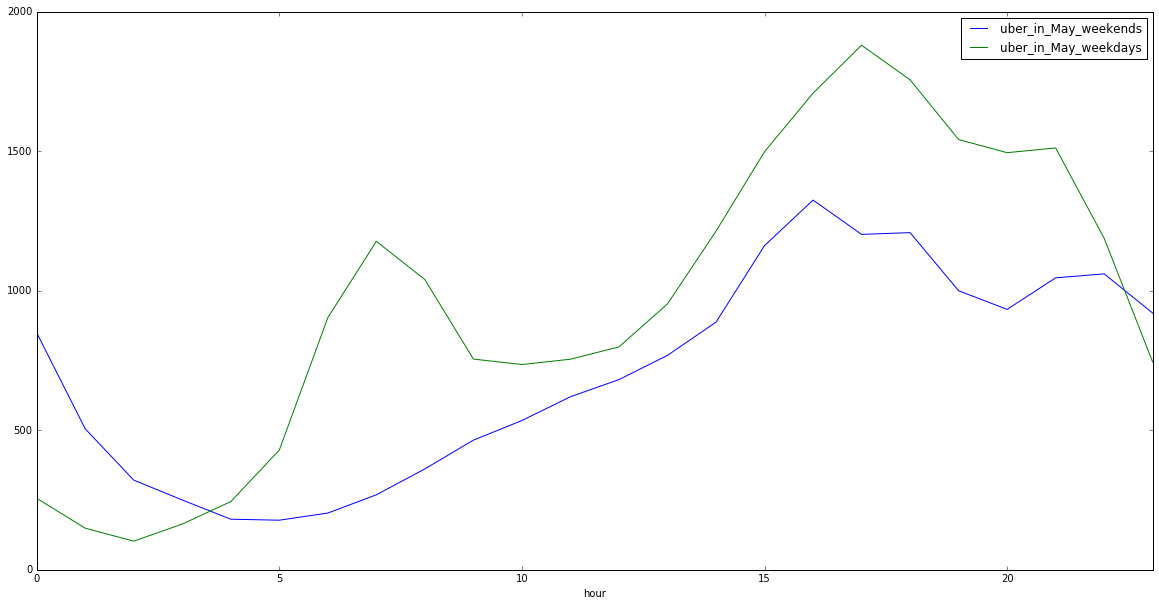

In [41]:
lr_26.plot(figsize=(20,10))

In [46]:
result = pd.concat([r_26, lr_26], axis=1)
result

,yellow_taxi_in_May_weekends,yellow_taxi_in_May_weekdays,uber_in_May_weekends,uber_in_May_weekdays
hour,,,,
0,1349.0,781.523810,84.94,256.238095
1,1190.2,460.904762,50.53,149.190476
2,915.2,298.285714,32.15,102.714286
3,690.4,182.142857,25.02,164.000000
4,456.5,161.047619,18.13,244.380952
5,283.0,167.285714,17.78,429.095238
6,207.2,409.666667,20.34,903.857143
7,242.7,704.238095,26.88,1177.380952
8,376.7,1042.857143,36.16,1040.190476


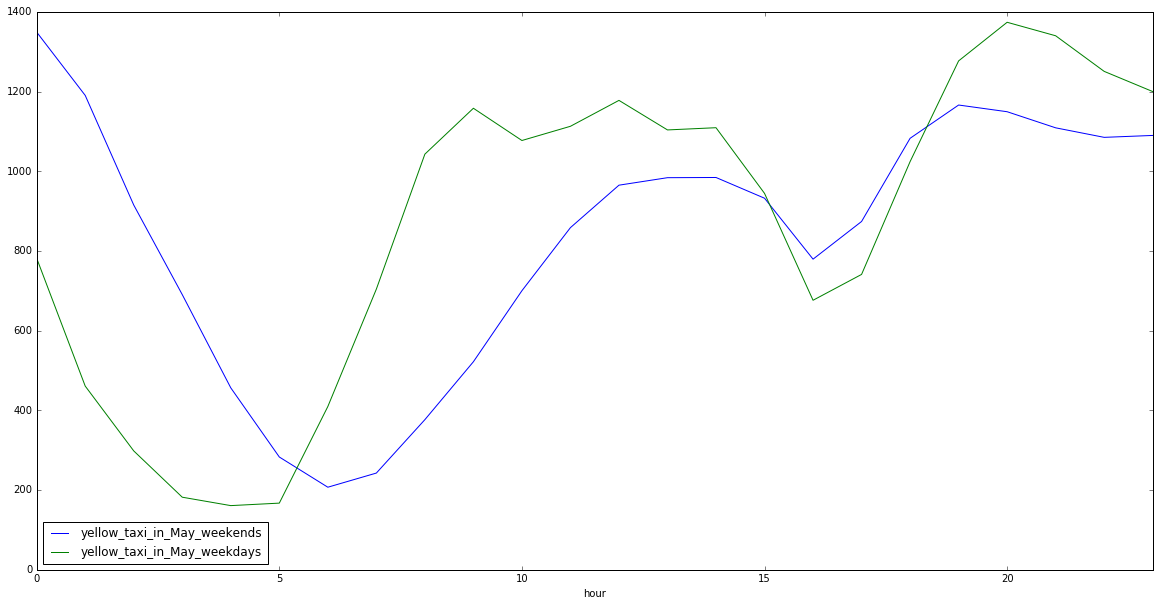

In [42]:
r_26.plot(figsize=(20,10))

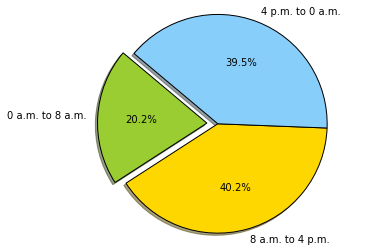

In [48]:
import matplotlib.pyplot as plt
 
labels = ['0 a.m. to 8 a.m.', '8 a.m. to 4 p.m.', '4 p.m. to 0 a.m.']
sizes = [4464, 8356, 8202]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


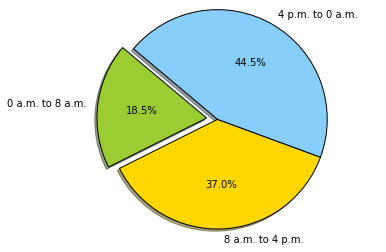

In [49]:
import matplotlib.pyplot as plt
 
labels = ['0 a.m. to 8 a.m.', '8 a.m. to 4 p.m.', '4 p.m. to 0 a.m.']
sizes = [4204, 8414, 10117]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()